

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*


------

# Objective 

We are going to run a few experiments today

- Train a model with and without normalized data and investigate the weight values and learning outcomes
- Train a model with varying values for batch_size, learning_rate, and optimizers

We are essentially running mannual gridsearches on our models. In module 3, we'll learn a few different ways to automate gridseach for deep learning. 

In [57]:
import os
import datetime
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, ReLU
from sklearn.model_selection import train_test_split

from keras.optimizers import Adam, SGD, RMSprop, Nadam, Ftrl
from keras.activations import relu
from tensorflow.keras.callbacks import TensorBoard

In [2]:
%matplotlib inline
%load_ext tensorboard

### Load data

- Don't normalize your data just yet!

In [3]:
def load_quickdraw10():
    """
    Loads in the Quickdraw dataset, creates feature matrix and target vector,
    which are then split into train and test sets. Shuffling of the data occurs
    before the split.
    Returns: train and test sets of feature matrix and target vector
    """
    
    # url where data can be found on github
    URL_ = "https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/quickdraw10.npz?raw=true"
    
    # path for data file
    path_to_zip = tf.keras.utils.get_file('./quickdraw10.npz', origin=URL_, extract=False)

    # load in data
    data = np.load(path_to_zip)

    # create feature matrix and target vector
    X = data['arr_0']
    Y = data['arr_1']
    
    # split feature matrix and target vector into train and test sets, with shuffling of data
    return train_test_split(X, Y, shuffle=True)

In [4]:
X_train, X_test, y_train, y_test = load_quickdraw10()

In [5]:
n_labels = len(np.unique(y_train))
n_labels

10

----
### Write a Model Function
- Write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. 

Your function `create_model` should accept the following parameters

- Learning Rate `lr`
- Optimizer `opt`


Build a model with the following architecture and parameter values

- Use `1 hidden layer` 
- Use `sigmoid` activation function in hidden layer
- Use `250 nodes` in hidden layer 
- Use `10 nodes` in output layer
- Use `softmax` activation fucntion in output layer
- Use `sparse_categorical_crossentropy` loss function
- Use `accuracy` as your metric 

We will use this function to build all the models that we'll need to run our experiments. 

In [53]:
def create_model(lr=.01, opt="adam"):
    """
    
    Build and returns a complies Keras model.  
    
    Parameters
    ----------
    lr: float
        Learning rate parameter used for Stochastic Gradient Descent 
        
    opt: string
        Name of optimizer to use
        Valid options are "adam" and "sgd"
        
    Returns
    -------
    model: keras object 
        A complied keras model 
    """

    if opt == "adam":
        opt = Adam(learning_rate=lr)
    elif opt == 'sgd':
        opt = SGD(learning_rate=lr)
    elif opt == 'rmsprop':
        opt = RMSprop(learning_rate=lr)
    elif opt == 'nadam':
        opt = Nadam(learning_rate=lr)
    elif opt == 'ftrl':
        opt = Ftrl(learning_rate=lr)
    else:
        print ("{} is not a valid option. Defaulting to Adam optimizer".format(opt))
        opt = Adam(learning_rate=lr)

    # instantiate model
    model = Sequential([
        # add hidden layer
        Dense(250, activation='sigmoid', input_dim=784),
        # add output layer
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [7]:
# a check on model architecture
model = create_model()
n_layers = len(model.get_config()["layers"])
output_act_funct =  model.get_config()["layers"][-1]["config"]["activation"]

assert n_layers == 3, "You should have an input, one hidden, and an output layer"
assert output_act_funct == "softmax", "Output act funct should be softmax"

------

# Experiment #1: How does normalized input data affect our model's learning outcome?

In this experiment we are going to answer the above question by training identifical models on a normalized data set and on a non-normalized data set. 

Then we will 

- Analyze the trained weight values of our model 
- Plot

In [8]:
# Clear any logs from previous runs
!rm -rf ./logs/

### Fit Model on Non-Normalized data

In [9]:
# fit model on non-normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"No_Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

model = create_model(lr=.001, opt="adam")

model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=32, 
          verbose=1, 
          callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 4s 2ms/step - loss: 1.1345 - accuracy: 0.6411 - val_loss: 0.8426 - val_accuracy: 0.7460
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.8348 - accuracy: 0.7414 - val_loss: 0.7995 - val_accuracy: 0.7512
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7828 - accuracy: 0.7564 - val_loss: 0.7491 - val_accuracy: 0.7698
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7420 - accuracy: 0.7696 - val_loss: 0.7476 - val_accuracy: 0.7702
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7296 - accuracy: 0.7760 - val_loss: 0.7300 - val_accuracy: 0.7768
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7208 - accuracy: 0.7748 - val_loss: 0.7251 - val_accuracy: 0.7776
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7108 - accuracy: 0.7815 - val_loss: 0.7319 - val_accuracy:

---------

### Fit Model on Normalized data

In [10]:
max_pixel_value = X_train.max()

In [11]:
# Normalize your training and test sets 
# save normalized data to X_train_scaled and X_test_scaled
X_train_scaled = X_train / max_pixel_value
X_test_scaled = X_test / max_pixel_value

In [12]:
# train model on normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

norm_model = create_model(lr=.001, opt="adam")

norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=32, 
          verbose=1, 
          callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.9470 - accuracy: 0.7170 - val_loss: 0.6092 - val_accuracy: 0.8218
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5769 - accuracy: 0.8292 - val_loss: 0.5123 - val_accuracy: 0.8474
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4706 - accuracy: 0.8596 - val_loss: 0.4681 - val_accuracy: 0.8597
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4133 - accuracy: 0.8792 - val_loss: 0.4564 - val_accuracy: 0.8650
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3645 - accuracy: 0.8925 - val_loss: 0.4318 - val_accuracy: 0.8713
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3272 - accuracy: 0.9028 - val_loss: 0.4359 - val_accuracy: 0.8713
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2985 - accuracy: 0.9112 - val_loss: 0.4263 - val_accuracy:

### Each layer is labeled

Take note of the label for each layer in the network. It is these labels that will help you identify the corresponding bias and weight distribtuions on tensorboard. 

Assuming that you've ran `create_model` 3 times: once for the model check, once to create `model`, and once to create `norm_model`:

The name of the layers for `model` should be 
- dense_2
- dense_3

The name of the layers for `norm_model` should be 
- dense_4
- dense_5


If you keep retraining one or both of these models, tensorflow will increment the integer used in the layer names.  But that doesn't really matter, just take notice of the layer names so you can find their corresponding bias and weight distribtuions in tensorboard.

**Protip:** If you want to reset the integer incrementation that tensorflow uses, you'll need to restart your notebook's kernal. 

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


In [14]:
norm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


### Tensorboard 

- Run the cell below to launch tensorboard 
- Click on the `SCALARS` tab to see plots that compare the loss and accuracy between the two models
- Cick on the `HISTOGRAMS` tab to see the distribution of the learned weights 

In [15]:
%tensorboard --logdir logs

### Tensorboard 

Check out the loss and accuracy plots on the `SCALARS` tab. 

What you should see is that the accuracy is much higher for the model that was given normalized data; conversely, the loss is much lower for the model that was given normalized data. 

Recall that what we are doing whenever training a model is adjusting the value of the bias and weights in each layer. For simplicity of analysis, we only trained two layers: a hidden layer and the output layer. 

Now click on the `HISTOGRAM` tab. 

You should see both of your model's layer names. 

### Hidden Layer Distributions

Collapse the charts that correspond to the output layer so only the distributions for the weights and bias in the hidden layer are showing. (i.e. Only expand `dense_2` and `dense_4`). 

Also don't be confused by the word `kernel`, that's just the word that Tensorflow uses instead of weights. So, to be clear, **the kernal distributions are the weight values.** 

The `bias` distributions are the bias values. 

You should see 10 distributions stacked next to each other, **one distribution per epoch.**

The distribuion in the far back corresponds to the weight values at epoch 1 (tensorflow starts the count at 0, like the index for a list). The distribution at the very front corresponds to the weight values at the 10th epoch (tensorflow indexing show 9 instead of 10).

Notice how the shape of the distribution changes accross epochs? That's because their **values are being updated via Gradient Descent.** 

The distributions that you see are direclty responsible for the validation accuracy of our models. The reason why they look different between the two models is because one model was given normalize data and one wasn't. So you can conclude that the weight distributions in `dense_4` produce a higher validation accuracy than the weight distributions in `dense_2`. 

Now it's time to analyze those weight values more closely. 

----------
### Analyze Weights in Each Layer

In [16]:
# get the final bias and weight matrices for model
layer = model.get_layer(name="dense_2")
bias, weights = layer.get_weights()

In [17]:
# get the final  value bias and weight magrices for norm_moel
layer = norm_model.get_layer(name="dense_4")
bias_norm, weights_norm = layer.get_weights()

In [18]:
# this line of code should not throw an error if the number of weights is the same for the hidden layer of both models
# this line of code is known as a Unit Test 
assert weights.shape[0] == weights_norm.shape[0]

### Initial Weight Values

By default, Keras dense layers randomly initialize the weight values using [**GlorotUniform**](https://keras.io/api/layers/initializers/). 

The cell below is sampling values from the GlorotUniform distribution. Let's sample from the GlorotUniform distribution and plot it in order to get a sense of the initial distribution of our weights - before Gradient Descent starts upading their values at training time. 

In [19]:
# let's take 250 random samples form the GlorotUniform
# because they are random samples their exact values might have been a little different for model and norm_model - but we will assume that they were not statistically different 
# 250 because that's how many weights are in the hidden layer for both of our models
initializer = tf.keras.initializers.GlorotUniform(seed=1234)
initial_weight_values = initializer(shape=(1, 250))

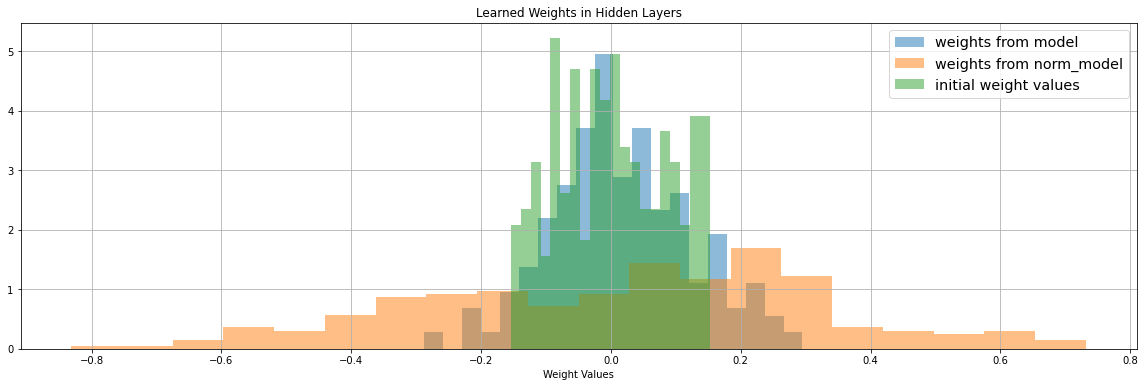

In [20]:
plt.figure(figsize=(20,6))
plt.title("Learned Weights in Hidden Layers")
plt.xlabel("Weight Values")
plt.grid()

# by setting density=True, we are transforming our plots into probability distributions 
plt.hist(weights, bins=20, alpha=0.5, label="weights from model", density=True);
plt.hist(weights_norm, bins=20, alpha=0.5, label="weights from norm_model", density=True);
plt.hist(initial_weight_values, bins=20, alpha=0.5, label="initial weight values", density=True);
plt.legend(fontsize="x-large");

### Observations

Your plot should have 3 distributions

- weights from model trained on non-normalized data
- weights from model trained on normalized data
- initial weight values sampled from a Glorot Uniform distributions 

Use the plot to answer the following questions.

**Comparing the initial weights with weights_from_model, what was the effect of not using normalized data?**

The distribution of the weights does not really change.

**Comparing the initial weights with weights_from_norm_model, what was the effect of using normalized data?**

The weight distribution changes quite a bit. The range of weight values is larger. The values are pretty spread out; there is not a distinct peak.

**Using your understand of how Gradient Descent works, why do you think that the distributions between weights_from_model and weights_from_norm_model look so different?**

Gradient Descent tries to find a point where there is little to no change--point with smallest slope. Gradient Descent occurs along loss curves, which are a function of the weight an input is being multiplied by in the neural net. The distrubtions of weights from the normalized and not normalized models are so different because of the lack of relativity among inputs to the model. Without normalization, the data is different up to 2 degrees of magnitude, making it hard to compare the data to each other. This leads to Gradient Descent not being able to really take place.

----

# Additional Experiments

The previous experiment demonstrated the importance of normalizing our data in order to maximize model accuracy. In the next few experiments, we are going to explore the effect that certain values for Batch Size, Learning Rate, and different Optimizers have on model accuracy. 

Using our **create_model** model building function, conduct the following experiments. 

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

#### Batch Size 10

In [21]:
norm_model = create_model(lr=.001, opt="adam")

batch_10 = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=10, 
          verbose=1)

Epoch 1/10
7500/7500 [==============================] - 8s 1ms/step - loss: 0.8591 - accuracy: 0.7412 - val_loss: 0.5473 - val_accuracy: 0.8373
Epoch 2/10
7500/7500 [==============================] - 7s 915us/step - loss: 0.5020 - accuracy: 0.8505 - val_loss: 0.4652 - val_accuracy: 0.8608
Epoch 3/10
7500/7500 [==============================] - 7s 922us/step - loss: 0.4106 - accuracy: 0.8768 - val_loss: 0.4522 - val_accuracy: 0.8668
Epoch 4/10
7500/7500 [==============================] - 7s 927us/step - loss: 0.3508 - accuracy: 0.8956 - val_loss: 0.4386 - val_accuracy: 0.8705
Epoch 5/10
7500/7500 [==============================] - 7s 908us/step - loss: 0.3011 - accuracy: 0.9109 - val_loss: 0.4354 - val_accuracy: 0.8741
Epoch 6/10
7500/7500 [==============================] - 7s 920us/step - loss: 0.2695 - accuracy: 0.9196 - val_loss: 0.4369 - val_accuracy: 0.8766
Epoch 7/10
7500/7500 [==============================] - 7s 917us/step - loss: 0.2357 - accuracy: 0.9308 - val_loss: 0.4541 - v

#### Batch Size 32 -- default

In [22]:
norm_model = create_model(lr=.001, opt="adam")

batch_32 = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=32, 
          verbose=1)

Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.9382 - accuracy: 0.7206 - val_loss: 0.6016 - val_accuracy: 0.8240
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5722 - accuracy: 0.8304 - val_loss: 0.5053 - val_accuracy: 0.8505
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4715 - accuracy: 0.8608 - val_loss: 0.4716 - val_accuracy: 0.8590
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4116 - accuracy: 0.8782 - val_loss: 0.4513 - val_accuracy: 0.8647
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3694 - accuracy: 0.8918 - val_loss: 0.4318 - val_accuracy: 0.8728
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3301 - accuracy: 0.9030 - val_loss: 0.4426 - val_accuracy: 0.8708
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3038 - accuracy: 0.9108 - val_loss: 0.4285 - val_accuracy:

#### Batch Size 100

In [23]:
norm_model = create_model(lr=.001, opt="adam")

batch_100 = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=100, 
          verbose=1)

Epoch 1/10
750/750 [==============================] - 1s 2ms/step - loss: 1.0907 - accuracy: 0.6782 - val_loss: 0.7016 - val_accuracy: 0.7967
Epoch 2/10
750/750 [==============================] - 1s 1ms/step - loss: 0.6711 - accuracy: 0.8044 - val_loss: 0.5972 - val_accuracy: 0.8246
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 0.5680 - accuracy: 0.8325 - val_loss: 0.5366 - val_accuracy: 0.8420
Epoch 4/10
750/750 [==============================] - 1s 2ms/step - loss: 0.5023 - accuracy: 0.8526 - val_loss: 0.4997 - val_accuracy: 0.8536
Epoch 5/10
750/750 [==============================] - 1s 2ms/step - loss: 0.4502 - accuracy: 0.8674 - val_loss: 0.4795 - val_accuracy: 0.8567
Epoch 6/10
750/750 [==============================] - 1s 2ms/step - loss: 0.4194 - accuracy: 0.8773 - val_loss: 0.4673 - val_accuracy: 0.8612
Epoch 7/10
750/750 [==============================] - 1s 2ms/step - loss: 0.3900 - accuracy: 0.8860 - val_loss: 0.4492 - val_accuracy: 0.8684
Epoch 

#### Batch Size 500

In [24]:
norm_model = create_model(lr=.001, opt="adam")

batch_500 = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=500, 
          verbose=1)

Epoch 1/10
150/150 [==============================] - 1s 5ms/step - loss: 1.4270 - accuracy: 0.5783 - val_loss: 0.8429 - val_accuracy: 0.7585
Epoch 2/10
150/150 [==============================] - 1s 4ms/step - loss: 0.8167 - accuracy: 0.7610 - val_loss: 0.7543 - val_accuracy: 0.7814
Epoch 3/10
150/150 [==============================] - 1s 4ms/step - loss: 0.7370 - accuracy: 0.7861 - val_loss: 0.6991 - val_accuracy: 0.7970
Epoch 4/10
150/150 [==============================] - 1s 4ms/step - loss: 0.6809 - accuracy: 0.7997 - val_loss: 0.6543 - val_accuracy: 0.8105
Epoch 5/10
150/150 [==============================] - 1s 5ms/step - loss: 0.6390 - accuracy: 0.8141 - val_loss: 0.6129 - val_accuracy: 0.8230
Epoch 6/10
150/150 [==============================] - 1s 4ms/step - loss: 0.6044 - accuracy: 0.8219 - val_loss: 0.5840 - val_accuracy: 0.8314
Epoch 7/10
150/150 [==============================] - 1s 4ms/step - loss: 0.5635 - accuracy: 0.8363 - val_loss: 0.5573 - val_accuracy: 0.8388
Epoch 

#### Batch Size 1000

In [25]:
norm_model = create_model(lr=.001, opt="adam")

batch_1000 = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=1000, 
          verbose=1)

Epoch 1/10
75/75 [==============================] - 1s 8ms/step - loss: 1.6798 - accuracy: 0.4947 - val_loss: 0.9409 - val_accuracy: 0.7293
Epoch 2/10
75/75 [==============================] - 0s 6ms/step - loss: 0.9168 - accuracy: 0.7364 - val_loss: 0.8331 - val_accuracy: 0.7606
Epoch 3/10
75/75 [==============================] - 0s 6ms/step - loss: 0.8289 - accuracy: 0.7600 - val_loss: 0.7809 - val_accuracy: 0.7750
Epoch 4/10
75/75 [==============================] - 0s 6ms/step - loss: 0.7699 - accuracy: 0.7764 - val_loss: 0.7395 - val_accuracy: 0.7860
Epoch 5/10
75/75 [==============================] - 0s 6ms/step - loss: 0.7283 - accuracy: 0.7890 - val_loss: 0.7045 - val_accuracy: 0.7989
Epoch 6/10
75/75 [==============================] - 0s 6ms/step - loss: 0.6969 - accuracy: 0.7978 - val_loss: 0.6737 - val_accuracy: 0.8061
Epoch 7/10
75/75 [==============================] - 0s 6ms/step - loss: 0.6619 - accuracy: 0.8079 - val_loss: 0.6461 - val_accuracy: 0.8137
Epoch 8/10
75/75 [==

#### Visualize Results

In [68]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([batch_10, batch_32, batch_100, batch_500, batch_1000], ["10_", "32_", "100_", "500_", "1000_"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result

    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.701512,0.790413,0.547269,0.83728,0,10_
1,0.489188,0.854427,0.465193,0.86076,1,10_
2,0.408814,0.877693,0.452205,0.86680,2,10_
3,0.354409,0.893587,0.438556,0.87052,3,10_
4,0.309618,0.908040,0.435398,0.87412,4,10_


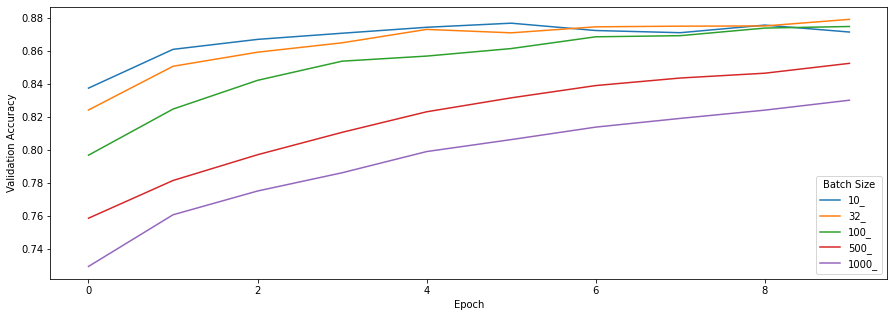

In [44]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy');

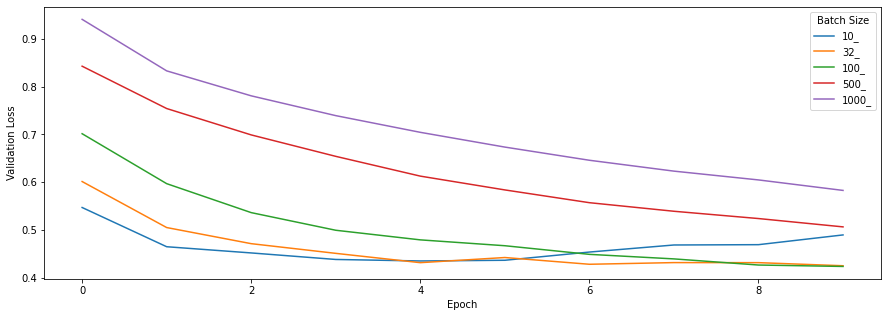

In [45]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss');

It seems that the best model is the one that used 32 batches. This happens to be the default batch size value.

The validation accuracy for 32 batches reaches it max before the other models, and it remains pretty constant.

The loss for the model with 32 batches reaches its lowest point, and it remains pretty constant. Its lowest point is the second lowest loss. Only the model with 100 batches has a lower loss. I did not deem this model the best, because its validation accurary has not flattened out--it is still learning.

The 32 batch model outperforms the model from yesterday's assignment when it comes to both accuracy and loss.

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

#### Learning rate = 1

In [29]:
norm_model = create_model(lr=1, opt="adam")

lr_1 = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=32, 
          verbose=1)

Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 22.9542 - accuracy: 0.3474 - val_loss: 13.6721 - val_accuracy: 0.4711
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 15.3172 - accuracy: 0.4277 - val_loss: 10.9526 - val_accuracy: 0.4978
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 14.7253 - accuracy: 0.4650 - val_loss: 16.2373 - val_accuracy: 0.5500
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 15.4782 - accuracy: 0.4777 - val_loss: 22.5362 - val_accuracy: 0.3412
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 14.9906 - accuracy: 0.4862 - val_loss: 25.0729 - val_accuracy: 0.5076
Epoch 6/10
2344/2344 [==============================] - 4s 2ms/step - loss: 14.8282 - accuracy: 0.4961 - val_loss: 12.6506 - val_accuracy: 0.5315
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 14.0386 - accuracy: 0.4940 - val_loss: 9.5122 - 

#### Learning rate = 0.1

In [30]:
norm_model = create_model(lr=0.1, opt="adam")

lr_0_1 = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=32, 
          verbose=1)

Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.7067 - accuracy: 0.5609 - val_loss: 1.2568 - val_accuracy: 0.6552
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.4136 - accuracy: 0.6360 - val_loss: 1.6952 - val_accuracy: 0.6253
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.3106 - accuracy: 0.6626 - val_loss: 1.2821 - val_accuracy: 0.6860
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.2603 - accuracy: 0.6726 - val_loss: 1.1063 - val_accuracy: 0.7096
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.2449 - accuracy: 0.6829 - val_loss: 1.2475 - val_accuracy: 0.6974
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.2262 - accuracy: 0.6843 - val_loss: 1.4872 - val_accuracy: 0.5835
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.2014 - accuracy: 0.6934 - val_loss: 1.0947 - val_accuracy:

#### Learning rate = 0.01

In [31]:
norm_model = create_model(lr=0.01, opt="adam")

lr_0_01 = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=32, 
          verbose=1)

Epoch 1/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.7793 - accuracy: 0.7590 - val_loss: 0.5703 - val_accuracy: 0.8307
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5394 - accuracy: 0.8376 - val_loss: 0.5404 - val_accuracy: 0.8409
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5031 - accuracy: 0.8466 - val_loss: 0.5452 - val_accuracy: 0.8401
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4739 - accuracy: 0.8563 - val_loss: 0.5259 - val_accuracy: 0.8469
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4489 - accuracy: 0.8623 - val_loss: 0.5194 - val_accuracy: 0.8492
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4320 - accuracy: 0.8666 - val_loss: 0.5693 - val_accuracy: 0.8417
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4085 - accuracy: 0.8760 - val_loss: 0.5621 - val_accuracy:

#### Learning rate = 0.001

In [32]:
norm_model = create_model(lr=0.001, opt="adam")

lr_0_001 = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=32, 
          verbose=1)

Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.9589 - accuracy: 0.7156 - val_loss: 0.6267 - val_accuracy: 0.8144
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5793 - accuracy: 0.8277 - val_loss: 0.5151 - val_accuracy: 0.8463
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4705 - accuracy: 0.8603 - val_loss: 0.4678 - val_accuracy: 0.8612
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4167 - accuracy: 0.8771 - val_loss: 0.4445 - val_accuracy: 0.8682
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3709 - accuracy: 0.8913 - val_loss: 0.4400 - val_accuracy: 0.8702
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3299 - accuracy: 0.9038 - val_loss: 0.4182 - val_accuracy: 0.8763
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3035 - accuracy: 0.9120 - val_loss: 0.4321 - val_accuracy:

#### Learning rate = 0.0001

In [33]:
norm_model = create_model(lr=0.0001, opt="adam")

lr_0_0001 = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=32, 
          verbose=1)

Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.4577 - accuracy: 0.5985 - val_loss: 0.8916 - val_accuracy: 0.7444
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.8712 - accuracy: 0.7462 - val_loss: 0.8038 - val_accuracy: 0.7684
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7950 - accuracy: 0.7687 - val_loss: 0.7524 - val_accuracy: 0.7831
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7528 - accuracy: 0.7827 - val_loss: 0.7160 - val_accuracy: 0.7935
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7055 - accuracy: 0.7957 - val_loss: 0.6852 - val_accuracy: 0.8024
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6708 - accuracy: 0.8056 - val_loss: 0.6561 - val_accuracy: 0.8120
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6447 - accuracy: 0.8131 - val_loss: 0.6332 - val_accuracy:

#### Visualize Results

In [69]:
learning_rates = []

for exp, result in zip([lr_1, lr_0_1, lr_0_01, lr_0_001, lr_0_0001], ["1_0", "0_1", "0_01", "0_001", "0_0001"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result

    learning_rates.append(df)

df = pd.concat(learning_rates)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,17.457470,0.381747,13.672055,0.47112,0,1_0
1,15.543145,0.435520,10.952574,0.49776,1,1_0
2,15.314016,0.464333,16.237305,0.55000,2,1_0
3,15.627847,0.474453,22.536198,0.34124,3,1_0
4,14.659723,0.493413,25.072945,0.50756,4,1_0


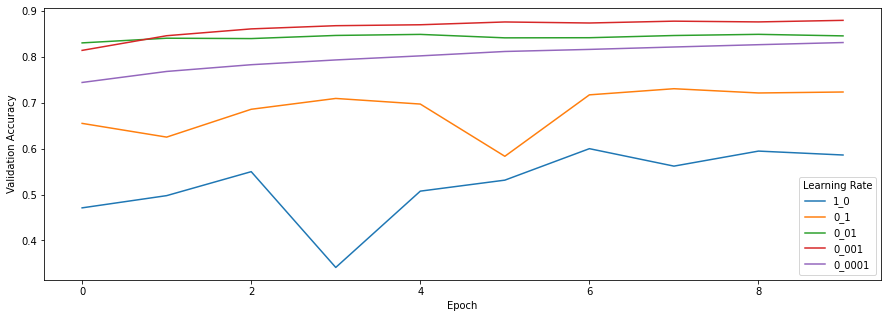

In [47]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy');

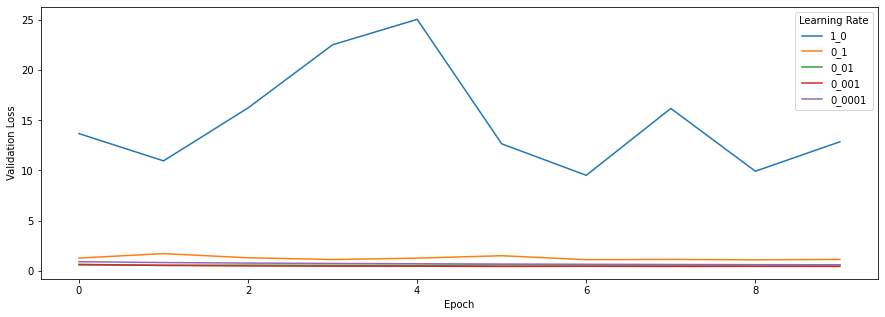

In [48]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss');

In [70]:
# highest accuracy overall
df['val_accuracy'].max()

0.879800021648407

In [71]:
# highest accuracy for best model
df[df['Learning Rate']=='0_001']['val_accuracy'].max()

0.879800021648407

In [52]:
# lowest val_loss overall
df['val_loss'].min()

0.4171420633792877

In [51]:
# lowest val_loss for best model
df[df['Learning Rate']=='0_001']['val_loss'].min()

0.4171420633792877

The best model based on learning rate is the model with a learning rate of 0.001. This model has the highest validation accuracy, which is pretty constant. This model also has the lowest validation loss. 

The model with a learning rate of 0.001 has a better validation accuracy and validation loss than the model from yesterday's assignment.

The validation accuracy of this model is better than the one for the best model from the batch size experiments. The validation loss is roughly the same.

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

#### Optimizer: Adam (default)

In [54]:
norm_model = create_model(lr=.001, opt="adam")

opt_adam = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=32, 
          verbose=1)

Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.9644 - accuracy: 0.7094 - val_loss: 0.6168 - val_accuracy: 0.8215
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5797 - accuracy: 0.8265 - val_loss: 0.5167 - val_accuracy: 0.8472
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4707 - accuracy: 0.8611 - val_loss: 0.4736 - val_accuracy: 0.8598
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4147 - accuracy: 0.8776 - val_loss: 0.4457 - val_accuracy: 0.8685
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3714 - accuracy: 0.8902 - val_loss: 0.4400 - val_accuracy: 0.8692
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3302 - accuracy: 0.9021 - val_loss: 0.4244 - val_accuracy: 0.8751
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2985 - accuracy: 0.9122 - val_loss: 0.4289 - val_accuracy:

#### Optimizer: SGD

In [55]:
norm_model = create_model(lr=.001, opt="sgd")

opt_sgb = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=32, 
          verbose=1)

Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 2.2834 - accuracy: 0.2153 - val_loss: 2.0384 - val_accuracy: 0.5231
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.9811 - accuracy: 0.5384 - val_loss: 1.8165 - val_accuracy: 0.5964
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.7710 - accuracy: 0.6002 - val_loss: 1.6349 - val_accuracy: 0.6335
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.6016 - accuracy: 0.6315 - val_loss: 1.4937 - val_accuracy: 0.6445
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.4693 - accuracy: 0.6508 - val_loss: 1.3866 - val_accuracy: 0.6594
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.3718 - accuracy: 0.6599 - val_loss: 1.3051 - val_accuracy: 0.6745
Epoch 7/10
2344/2344 [==============================] - 2s 1ms/step - loss: 1.2964 - accuracy: 0.6688 - val_loss: 1.2416 - val_accuracy:

#### Optimizer: RMSprop

In [58]:
norm_model = create_model(lr=.001, opt="rmsprop")

opt_rmsprop = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=32, 
          verbose=1)

Epoch 1/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.9384 - accuracy: 0.7181 - val_loss: 0.6072 - val_accuracy: 0.8237
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5693 - accuracy: 0.8320 - val_loss: 0.5447 - val_accuracy: 0.8348
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4853 - accuracy: 0.8561 - val_loss: 0.4832 - val_accuracy: 0.8576
Epoch 4/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4322 - accuracy: 0.8720 - val_loss: 0.4754 - val_accuracy: 0.8614
Epoch 5/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3979 - accuracy: 0.8831 - val_loss: 0.4553 - val_accuracy: 0.8682
Epoch 6/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3608 - accuracy: 0.8942 - val_loss: 0.4571 - val_accuracy: 0.8668
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3348 - accuracy: 0.9034 - val_loss: 0.4424 - val_accuracy:

#### Optimizer: Nadam

In [59]:
norm_model = create_model(lr=.001, opt="nadam")

opt_nadam = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=32, 
          verbose=1)

Epoch 1/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.9553 - accuracy: 0.7185 - val_loss: 0.6063 - val_accuracy: 0.8219
Epoch 2/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.5789 - accuracy: 0.8290 - val_loss: 0.5113 - val_accuracy: 0.8473
Epoch 3/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4748 - accuracy: 0.8581 - val_loss: 0.4661 - val_accuracy: 0.8628
Epoch 4/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4133 - accuracy: 0.8777 - val_loss: 0.4414 - val_accuracy: 0.8702
Epoch 5/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3620 - accuracy: 0.8923 - val_loss: 0.4278 - val_accuracy: 0.8742
Epoch 6/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3283 - accuracy: 0.9026 - val_loss: 0.4248 - val_accuracy: 0.8763
Epoch 7/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.2975 - accuracy: 0.9138 - val_loss: 0.4222 - val_accuracy:

#### Optimizer: Ftrl

In [60]:
norm_model = create_model(lr=.001, opt="ftrl")

opt_ftrl = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-1, 
          epochs=10, 
          batch_size=32, 
          verbose=1)

Epoch 1/10
2344/2344 [==============================] - 4s 1ms/step - loss: 2.3046 - accuracy: 0.0993 - val_loss: 2.3028 - val_accuracy: 0.0988
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3025 - val_accuracy: 0.1007
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 2.3025 - accuracy: 0.1028 - val_loss: 2.3022 - val_accuracy: 0.0968
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 2.3019 - accuracy: 0.1077 - val_loss: 2.3013 - val_accuracy: 0.1243
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 2.3009 - accuracy: 0.1179 - val_loss: 2.2996 - val_accuracy: 0.1592
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 2.2990 - accuracy: 0.1458 - val_loss: 2.2967 - val_accuracy: 0.1666
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 2.2957 - accuracy: 0.1889 - val_loss: 2.2915 - val_accuracy:

#### Visualize Results

In [72]:
optimizers = []

for exp, result in zip([opt_adam, opt_sgb, opt_rmsprop, opt_nadam, opt_ftrl], ["Adam", "SGD", "RMSprop", "Nadam", "Ftrl"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Optimizer'] = result

    optimizers.append(df)

df = pd.concat(optimizers)
df['Optimizer'] = df['Optimizer'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Optimizer
0,0.782813,0.766267,0.616759,0.82152,0,Adam
1,0.556672,0.834480,0.516680,0.84724,1,Adam
2,0.467429,0.861120,0.473592,0.85980,2,Adam
3,0.410850,0.878600,0.445693,0.86848,3,Adam
4,0.370672,0.890707,0.440040,0.86916,4,Adam


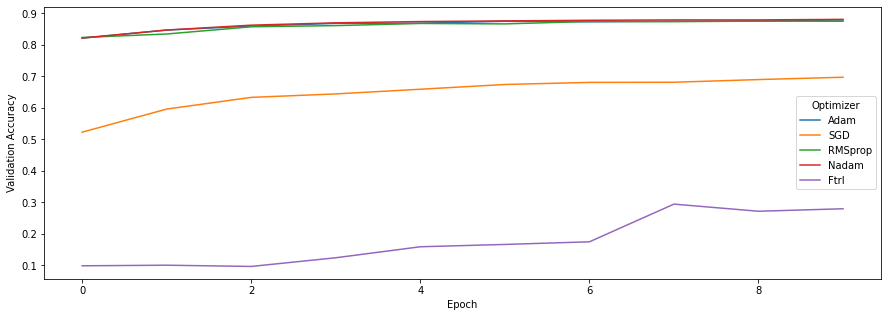

In [64]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='epoch', y='val_accuracy', hue='Optimizer', data=df)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy');

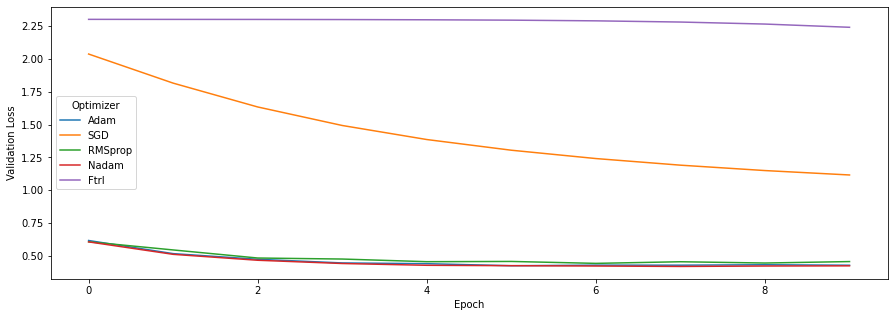

In [65]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='epoch', y='val_loss', hue='Optimizer', data=df)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss');

In [66]:
df['val_loss'].min()

0.41897571086883545

In [67]:
df['val_accuracy'].max()

0.8812400102615356

The best model is the one using Nadam as its optimizer. This model has the highest validation accuracy, and lowest validation loss. Both of the values are pretty constant after the second epoch.

This model performs better overall than the model from yesterday's assignment.

This model's validation loss is 0.001 higher than the validation loss for the model with the 0.001 learning rate. However, the accuracy for the best optimizer model is higher by 0.01.

------

## Stretch Goals: 

- On the learning rate experiments, implement [EarlyStopping](https://keras.io/api/callbacks/early_stopping/)
- Review the math of Gradient Descent. 